## Conduct Analysis
This notebook is intended to help analyze my research questions 

In [1]:
from scripts.project_functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set_theme(style = "darkgrid",
              font_scale = 1.25)

In [3]:
df = load_and_process('../data/raw/combine_data.csv')
df

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,0.0,NaN,10.0,300.0
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,6.0,Carolina Panthers,1.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,Jesus Wilson,WR,69,189,4.57,NaN,10.0,119.0,NaN,4.57,2017,0.0,NaN,10.0,300.0
5878,Howard Wilson,CB,73,184,4.57,33.5,NaN,119.0,6.68,3.94,2017,0.0,Cleveland Browns,4.0,126.0
5879,Ahkello Witherspoon,CB,75,198,4.45,40.5,NaN,127.0,6.93,4.13,2017,3.0,San Francisco 49ers,3.0,66.0
5880,Xavier Woods,S,71,197,4.54,33.5,19.0,122.0,6.72,4.13,2017,3.0,Dallas Cowboys,6.0,191.0


# Analyze draft pick and combine performance

To compare players, I first normalize the **Forty**, **Vertical**, **BenchReps**, **BroadJump**, **Cone**, and **Shuttle** athletic tests to better compare. For the normalization, I want scores between 0 and 1. Since a lower score is better in the Forty, Cone and Shuttle, I multiple these but -1 so I always get that higher scores are better. 

Next I create a new column called Score. We sum all of the normalized athelics scores in this column. The higher the number, the better the overall performance of the athlete. 

In [40]:
df['FortyNormal'] = (df['Forty'] - df['Forty'].min()) / (df['Forty'].max() - df['Forty'].min()) * -1
df['VerticalNormal'] = (df['Vertical'] - df['Vertical'].min()) / (df['Vertical'].max() - df['Vertical'].min()) * 1
df['BenchRepsNormal'] = (df['BenchReps'] - df['BenchReps'].min()) / (df['BenchReps'].max() - df['BenchReps'].min()) * 1
df['BroadJumpNormal'] = (df['BroadJump'] - df['BroadJump'].min()) / (df['BroadJump'].max() - df['BroadJump'].min()) * 1
df['ConeNormal'] = (df['Cone'] - df['Cone'].min()) / (df['Cone'].max() - df['Cone'].min()) * -1
df['ShuttleNormal'] = (df['Shuttle'] - df['Shuttle'].min()) / (df['Shuttle'].max() - df['Shuttle'].min()) * -1

In [41]:
df['Score'] = df['FortyNormal'] + df['VerticalNormal'] + df['BenchRepsNormal'] + df['BroadJumpNormal'] + df['ConeNormal'] + df['ShuttleNormal']  

In [18]:
df.sort_values(by=['Score'], ascending = False)

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,...,Team,Round,Pick,FortyNormal,VerticalNormal,BenchRepsNormal,BroadJumpNormal,ConeNormal,ShuttleNormal,Score
4778,Jerick McKinnon,RB,69,209,4.41,40.5,32.0,132.0,6.83,4.12,...,Minnesota Vikings,3.0,96.0,-0.103825,0.807018,0.638298,0.794521,-0.176259,-0.213115,1.746637
2003,Vernon Davis,TE,75,254,4.38,42.0,33.0,128.0,7.00,4.17,...,San Francisco 49ers,1.0,6.0,-0.087432,0.859649,0.659574,0.739726,-0.237410,-0.240437,1.693671
4918,Vic Beasley,OLB,75,246,4.53,41.0,35.0,130.0,6.91,4.15,...,Atlanta Falcons,1.0,8.0,-0.169399,0.824561,0.702128,0.767123,-0.205036,-0.229508,1.689869
168,Curtis Keaton,RB,70,214,4.41,41.5,23.0,131.0,6.82,3.93,...,Cincinnati Bengals,4.0,97.0,-0.103825,0.842105,0.446809,0.780822,-0.172662,-0.109290,1.683959
2145,Terna Nande,OLB,72,232,4.51,39.0,41.0,124.0,6.97,4.11,...,Tennessee Titans,5.0,137.0,-0.158470,0.754386,0.829787,0.684932,-0.226619,-0.207650,1.676366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,Jamaal Williams,RB,72,212,4.59,30.0,NaN,123.0,7.25,4.53,...,Green Bay Packers,4.0,134.0,-0.202186,0.438596,NaN,0.671233,-0.327338,-0.437158,NaN
5877,Jesus Wilson,WR,69,189,4.57,NaN,10.0,119.0,NaN,4.57,...,NaN,10.0,300.0,-0.191257,NaN,0.170213,0.616438,NaN,-0.459016,NaN
5878,Howard Wilson,CB,73,184,4.57,33.5,NaN,119.0,6.68,3.94,...,Cleveland Browns,4.0,126.0,-0.191257,0.561404,NaN,0.616438,-0.122302,-0.114754,NaN
5879,Ahkello Witherspoon,CB,75,198,4.45,40.5,NaN,127.0,6.93,4.13,...,San Francisco 49ers,3.0,66.0,-0.125683,0.807018,NaN,0.726027,-0.212230,-0.218579,NaN


In [19]:
df['Score'].isnull().sum()

3111

There are so many null values! I want to work with TE or WR. As the the athletic tests highlight receiver skills. You have to jump to catch, you need to be fast to create separation. The benchpress reps is more for linemen who do a lot of pushing, but Wide Receivers block sometimes and Tight Ends block very often. I suspect Tight Ends will have a more complete dataset. Let's look at how many nulls we have.

In [22]:
WR_data = df[df['Pos'] == 'WR']
TE_data = df[df['Pos'] == 'TE']

In [28]:
TE_data['Player'].count()

320

In [23]:
count_nan_in_df = TE_data.isnull().sum()
print (count_nan_in_df)

Player               0
Pos                  0
Ht                   0
Wt                   0
Forty                7
Vertical            71
BenchReps           64
BroadJump           75
Cone               107
Shuttle            107
Year                 0
AV                   0
Team               115
Round                0
Pick                 0
FortyNormal          7
VerticalNormal      71
BenchRepsNormal     64
BroadJumpNormal     75
ConeNormal         107
ShuttleNormal      107
Score              136
dtype: int64


In [29]:
WR_data['Player'].count()

813

In [24]:
count_nan_in_df = WR_data.isnull().sum()
print (count_nan_in_df)

Player               0
Pos                  0
Ht                   0
Wt                   0
Forty                8
Vertical           160
BenchReps          454
BroadJump          177
Cone               286
Shuttle            273
Year                 0
AV                   0
Team               322
Round                0
Pick                 0
FortyNormal          8
VerticalNormal     160
BenchRepsNormal    454
BroadJumpNormal    177
ConeNormal         286
ShuttleNormal      273
Score              561
dtype: int64


Wide receivers have 69% of their scores as null, whereas Tight Ends have only 43% as null. Tight Ends are the better set. It looks like many wide receivers did not partipate in the bench press as expected. 

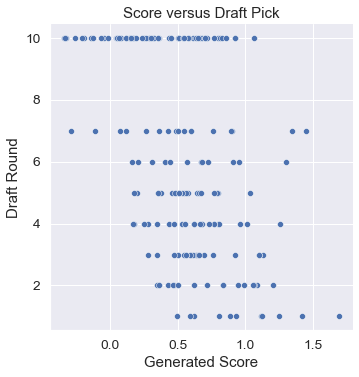

In [81]:
p1 = sns.relplot(x = "Score", y = "Round", data = TE_data)
plt.title('Score versus Draft Pick')
p1.set(xlabel = 'Generated Score', ylabel = 'Draft Round')

Wow. It worked! There is a very clear trend here. The higher the score the earlier the Tight Ends were picked in the draft. Who has that score of 1.8? He was picked in the first round of course!

In [34]:
TE_data.sort_values(by=['Score'], ascending = False).iloc[0]

Player                    Vernon Davis
Pos                                 TE
Ht                                  75
Wt                                 254
Forty                             4.38
Vertical                            42
BenchReps                           33
BroadJump                          128
Cone                                 7
Shuttle                           4.17
Year                              2006
AV                                   9
Team               San Francisco 49ers
Round                                1
Pick                                 6
FortyNormal                 -0.0874317
VerticalNormal                0.859649
BenchRepsNormal               0.659574
BroadJumpNormal               0.739726
ConeNormal                    -0.23741
ShuttleNormal                -0.240437
Score                          1.69367
Name: 2003, dtype: object

Vernon Davis. He was selected sixth overall in the 2006 draft. He played for the 49ers for 9 years from 2006 until mid 2015, when he was traded to the Denver Broncos. In 2016 we was traded to the Washington Redskins, now named the Washington Football team, and played there until he retired in 2019. From Bleacher the report:

>  Davis has displayed potential and he’s had flashes of brilliance—the 13-touchdown season in 2009, the back-to-back seasons of 900+ receiving yards, and the unbelievable playoff performances last year (10 receptions, 292 yards, and four touchdowns in two games). But he needs to put it together, be more consistent, and a better quarterback than Alex Smith would also help his case.

However, football is a team game.

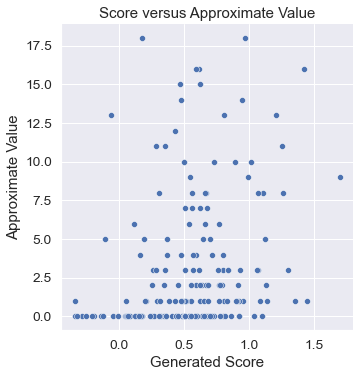

In [82]:
p1 = sns.relplot(x = "Score", y = "AV", data = TE_data)
plt.title('Score versus Approximate Value')
p1.set(xlabel = 'Generated Score', ylabel = 'Approximate Value')

AV or Approximate value is a one value score created by Doug Drinen the founder of Pro Football Reference. The higher the AV the better. The value is based on how important the player is to the team. It is a nontrivial score to obtain. you can read about it [read about it](https://www.pro-football-reference.com/blog/index37a8.html)

The scatterplot above of AV versus Score does not show a strong correlation - maybe a very weak one at best. 

# How do physical dimensions of the players compare by position?

Let's start by breaking our data into subsets positions based on role.

- Linemen (both offensive and defensive)
- Offense (QB, RB, FB, WR, TE)
- Defense (CB and S)
- Linebacker (OLB, ILB)
- Special (punters and kickers)

We remove the normalized and score columns.

In [42]:
df = df.drop(['FortyNormal', 'VerticalNormal', 'BenchRepsNormal', 'BroadJumpNormal'], axis=1)
df = df.drop(['ConeNormal', 'ShuttleNormal', 'Score'], axis=1)
df

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,0.0,NaN,10.0,300.0
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,6.0,Carolina Panthers,1.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,Jesus Wilson,WR,69,189,4.57,NaN,10.0,119.0,NaN,4.57,2017,0.0,NaN,10.0,300.0
5878,Howard Wilson,CB,73,184,4.57,33.5,NaN,119.0,6.68,3.94,2017,0.0,Cleveland Browns,4.0,126.0
5879,Ahkello Witherspoon,CB,75,198,4.45,40.5,NaN,127.0,6.93,4.13,2017,3.0,San Francisco 49ers,3.0,66.0
5880,Xavier Woods,S,71,197,4.54,33.5,19.0,122.0,6.72,4.13,2017,3.0,Dallas Cowboys,6.0,191.0


In [44]:
df.Pos.unique()

array(['OLB', 'RB', 'OT', 'TE', 'CB', 'PK', 'S', 'OG', 'ILB', 'DE', 'DT',
       'QB', 'WR', 'C', 'FB'], dtype=object)

In [54]:
lineman = df[(df['Pos'] == 'OT') | (df['Pos'] == 'OG') | (df['Pos'] == 'DT') | (df['Pos'] == 'DE') |(df['Pos'] == 'C')]
offense = df[(df['Pos'] == 'QB') | (df['Pos'] == 'RB') | (df['Pos'] == 'FB') | (df['Pos'] == 'WR') | (df['Pos'] == 'TE')]
defense = df[(df['Pos'] == 'S') | (df['Pos'] == 'CB')]
linebacker = df[(df['Pos'] == 'OLB') | (df['Pos'] == 'ILB')]
special = df[(df['Pos'] == 'PK')]

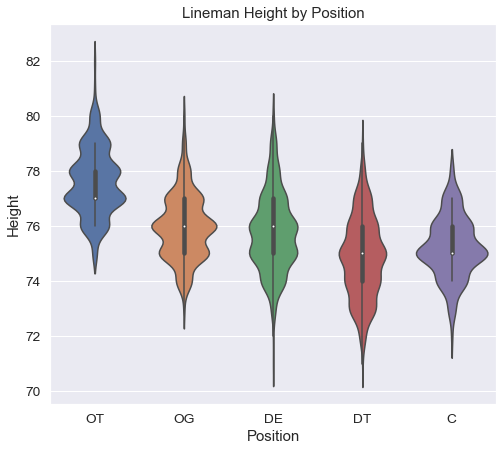

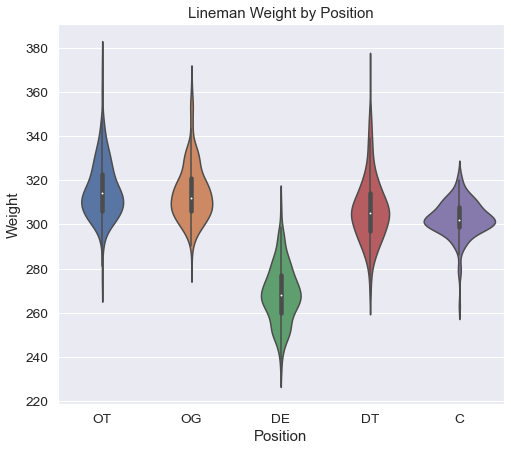

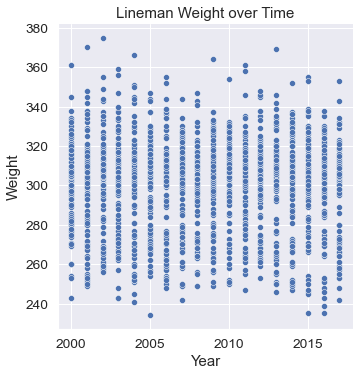

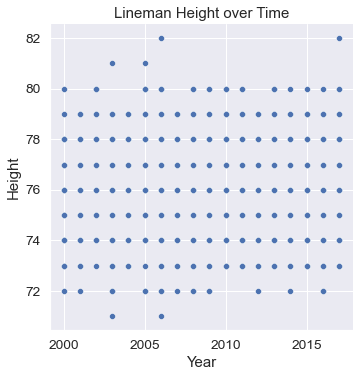

In [76]:
plt.figure(figsize = (8,7))
p1 = sns.violinplot(x = 'Pos',y = 'Ht', data = lineman)
plt.title('Lineman Height by Position')
p1.set(xlabel = 'Position', ylabel = 'Height')

plt.figure(figsize = (8,7))
p2 = sns.violinplot(x = 'Pos',y = 'Wt', data = lineman)
plt.title('Lineman Weight by Position')
p2.set(xlabel = 'Position', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Wt", data = linemen)
plt.title('Lineman Weight over Time')
p1.set(xlabel = 'Year', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Ht", data = linemen)
plt.title('Lineman Height over Time')
p1.set(xlabel = 'Year', ylabel = 'Height')

The offensive tackles are tallest linemen. Looks like the Center is not that tall, but weighs a lot compared to the other linemen. The weight and height over time is pretty consistent. Linemen are typically between 72" and 80" (6' and 6'8") and between 250 and 340 pounds.

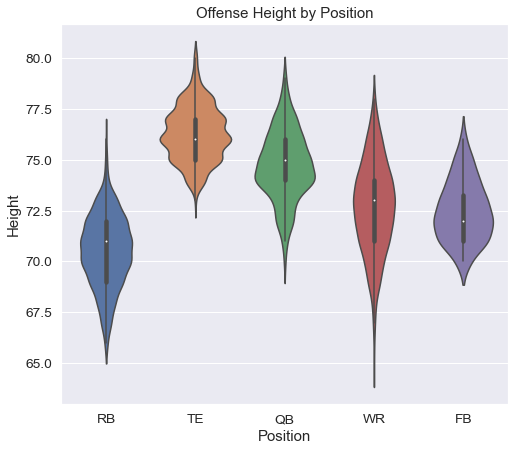

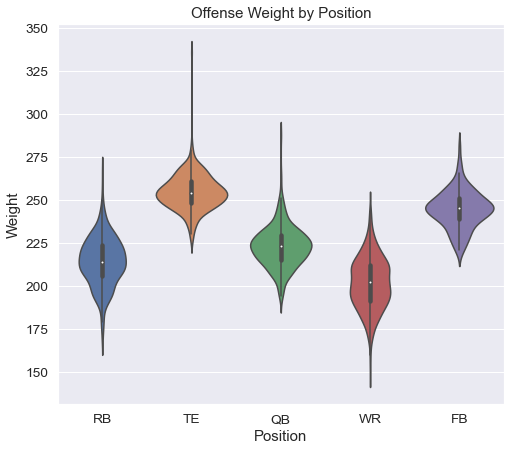

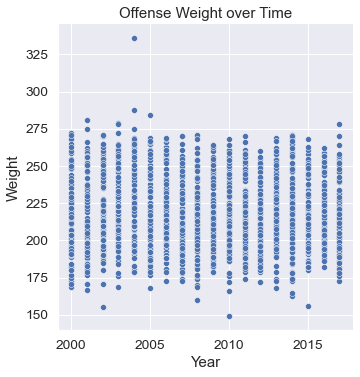

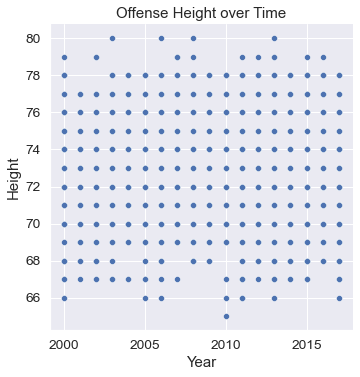

In [77]:
plt.figure(figsize = (8,7))
p1 = sns.violinplot(x = 'Pos',y = 'Ht', data = offense)
plt.title('Offense Height by Position')
p1.set(xlabel = 'Position', ylabel = 'Height')

plt.figure(figsize = (8,7))
p2 = sns.violinplot(x = 'Pos',y = 'Wt', data = offense)
plt.title('Offense Weight by Position')
p2.set(xlabel = 'Position', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Wt", data = offense)
plt.title('Offense Weight over Time')
p1.set(xlabel = 'Year', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Ht", data = offense)
plt.title('Offense Height over Time')
p1.set(xlabel = 'Year', ylabel = 'Height')

Observations:
- TE are the tallest
- WR height varies the most
- RB are the shortest
- WR are the lightest (as they are most probably the fastest)
- the offense height and weight has been pretty consistent over the years. Most look to be between 70 and 77 inches and between 180 and 260 pounds. Definitely lighter and short than the linemen!

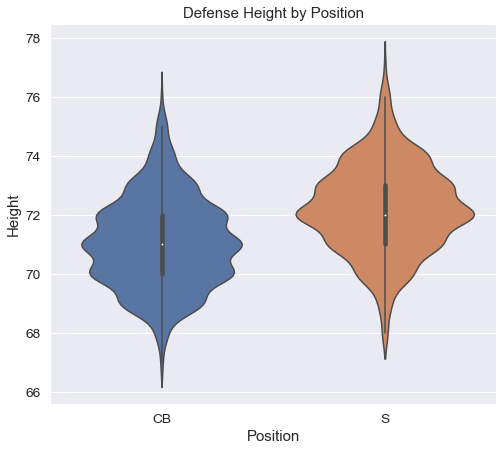

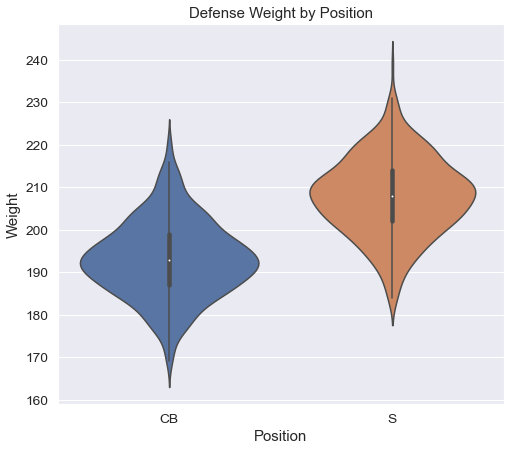

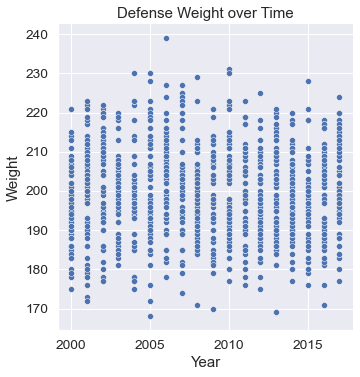

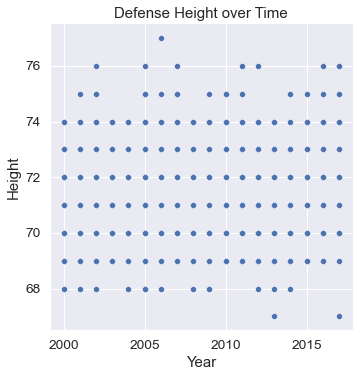

In [78]:
plt.figure(figsize = (8,7))
p1 = sns.violinplot(x = 'Pos',y = 'Ht', data = defense)
plt.title('Defense Height by Position')
p1.set(xlabel = 'Position', ylabel = 'Height')

plt.figure(figsize = (8,7))
p2 = sns.violinplot(x = 'Pos',y = 'Wt', data = defense)
plt.title('Defense Weight by Position')
p2.set(xlabel = 'Position', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Wt", data = defense)
plt.title('Defense Weight over Time')
p1.set(xlabel = 'Year', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Ht", data = defense)
plt.title('Defense Height over Time')
p1.set(xlabel = 'Year', ylabel = 'Height')

Obervations:
- Cornerbacks are smaller than the safeties. They need to cover the wide receviers! The average size is about 185 - 215 pounds and between 69 and 74 inches.

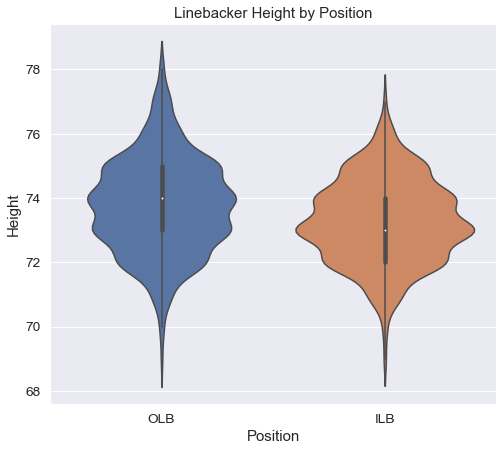

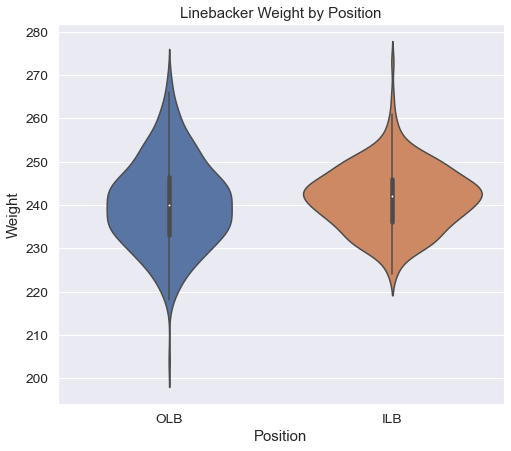

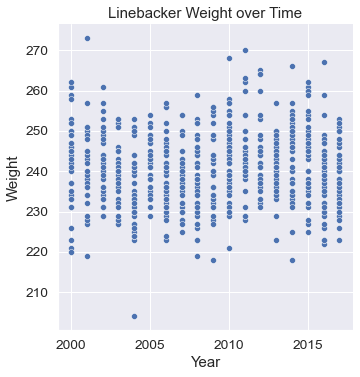

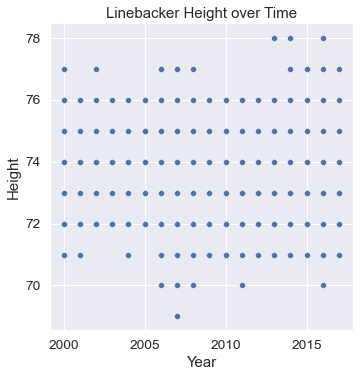

In [79]:
plt.figure(figsize = (8,7))
p1 = sns.violinplot(x = 'Pos',y = 'Ht', data = linebacker)
plt.title('Linebacker Height by Position')
p1.set(xlabel = 'Position', ylabel = 'Height')

plt.figure(figsize = (8,7))
p2 = sns.violinplot(x = 'Pos',y = 'Wt', data = linebacker)
plt.title('Linebacker Weight by Position')
p2.set(xlabel = 'Position', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Wt", data = linebacker)
plt.title('Linebacker Weight over Time')
p1.set(xlabel = 'Year', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Ht", data = linebacker)
plt.title('Linebacker Height over Time')
p1.set(xlabel = 'Year', ylabel = 'Height')

Observations:
-Outside Line backers are taller
-Linebacks are between 230 - 255 pounds and 72 - 76 inches

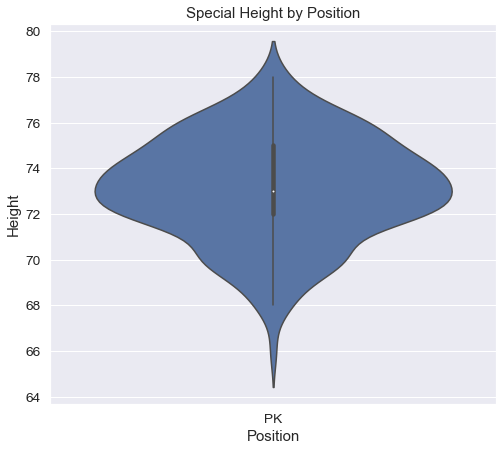

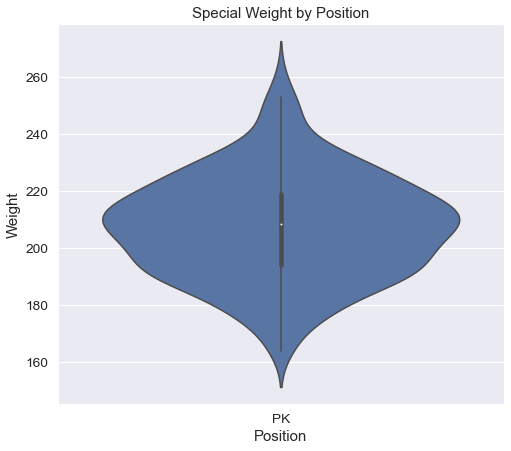

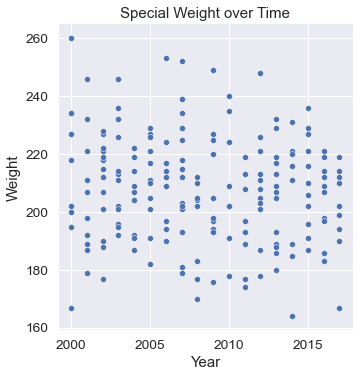

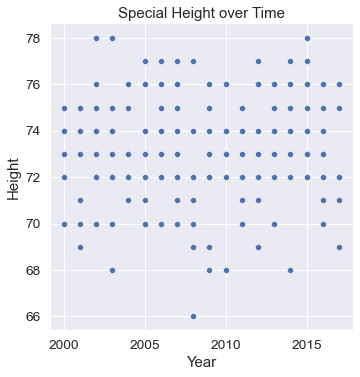

In [80]:
plt.figure(figsize = (8,7))
p1 = sns.violinplot(x = 'Pos',y = 'Ht', data = special)
plt.title('Special Height by Position')
p1.set(xlabel = 'Position', ylabel = 'Height')

plt.figure(figsize = (8,7))
p2 = sns.violinplot(x = 'Pos',y = 'Wt', data = special)
plt.title('Special Weight by Position')
p2.set(xlabel = 'Position', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Wt", data = special)
plt.title('Special Weight over Time')
p1.set(xlabel = 'Year', ylabel = 'Weight')

p1 = sns.relplot(x = "Year", y = "Ht", data = special)
plt.title('Special Height over Time')
p1.set(xlabel = 'Year', ylabel = 'Height')

Well, the kickers are a varied group in terms on height and weight. They are usually between 72 inches and 76 inches. the weight varies from 160 to 250, this is quite the range. The kickers only have one job - kicking the ball. As long as they can do that they are good.  